In [2]:
import pandas as pd
import numpy as np
import os

In [11]:
data_dir = '/opt/ml/input/data/'
train_data = pd.read_csv(os.path.join(data_dir, 'train_data.csv'))
test_data = pd.read_csv(os.path.join(data_dir, 'test_data.csv'))

In [12]:
df = pd.concat([train_data, test_data], ignore_index=True)
df.to_csv('./train+test.csv',index=False)

In [5]:
train = df[df.answerCode != -1]
test = df[df.answerCode == -1]

In [6]:
problems = train.assessmentItemID.unique()
students = train.userID.unique()

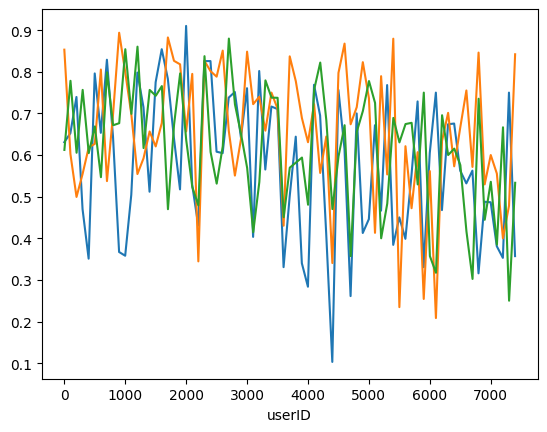

In [7]:
for i in range(3):
    train.groupby(['userID']).answerCode.mean()[i::100].plot()

In [9]:
train.groupby(['userID']).answerCode.mean()[i::100]

userID
2       0.612319
102     0.778355
202     0.605496
302     0.756549
402     0.604675
          ...   
7002    0.535714
7102    0.384615
7202    0.666667
7302    0.250000
7402    0.533333
Name: answerCode, Length: 75, dtype: float64

In [10]:
problem_rate = {problem:4000 for problem in problems}
student_rate = {student:4000 for student in students}

In [13]:
df = train[['userID', 'assessmentItemID', 'answerCode']]
df

,userID,assessmentItemID,answerCode
0,0,A060001001,1
1,0,A060001002,1
2,0,A060001003,1
3,0,A060001004,1
4,0,A060001005,1
...,...,...,...
2526694,7439,A040197006,1
2526695,7439,A040130001,0
2526696,7439,A040130002,1
2526697,7439,A040130003,1


In [14]:
K = 1

def win_rate(p_op, p_me):
    return 1/(10**((p_op-p_me)/100)+1)

def changed_score(p_op, p_me, result):
    game_pecent = win_rate(p_op, p_me)
    next_op = p_op + K*(result - game_pecent)
    next_me = p_me - K*(result + game_pecent)
    return next_op, next_me

In [15]:
for i in range(df.shape[0]):
    op, me, result = df.iloc[i]
    student_rate[op], problem_rate[me] = changed_score(student_rate[op], problem_rate[me], result)

In [16]:
problem_df = pd.DataFrame.from_dict(data=problem_rate, orient='index').rename(columns={0:'problem_rate'})
student_df = pd.DataFrame.from_dict(data=student_rate, orient='index').rename(columns={0:'student_rate'})

In [17]:
train['student_rate'] = train.userID.apply(lambda x:student_rate[x])
train['problem_rate'] = train.assessmentItemID.apply(lambda x:problem_rate[x])

/tmp/ipykernel_54942/3704586700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['student_rate'] = train.userID.apply(lambda x:student_rate[x])
/tmp/ipykernel_54942/3704586700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['problem_rate'] = train.assessmentItemID.apply(lambda x:problem_rate[x])


In [18]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,student_rate,problem_rate
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,4393.741434,3737.125432
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,4393.741434,3741.225221
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,4393.741434,3753.388501
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,4393.741434,3740.621231
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4393.741434,3746.486346
...,...,...,...,...,...,...,...,...
2526694,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,4010.860833,3713.472501
2526695,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,4010.860833,3861.520291
2526696,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,4010.860833,3847.665480
2526697,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,4010.860833,3742.092052


In [19]:
train.student_rate.describe()

count    2.525956e+06
mean     4.407170e+03
std      2.849200e+02
min      2.531908e+03
25%      4.200166e+03
50%      4.370552e+03
75%      4.577828e+03
max      5.538723e+03
Name: student_rate, dtype: float64

In [20]:
train.problem_rate.describe()

count    2.525956e+06
mean     3.801405e+03
std      6.664370e+01
min      3.646191e+03
25%      3.753453e+03
50%      3.799722e+03
75%      3.849238e+03
max      3.994283e+03
Name: problem_rate, dtype: float64

In [21]:
from math import log10 as log

<Axes: >

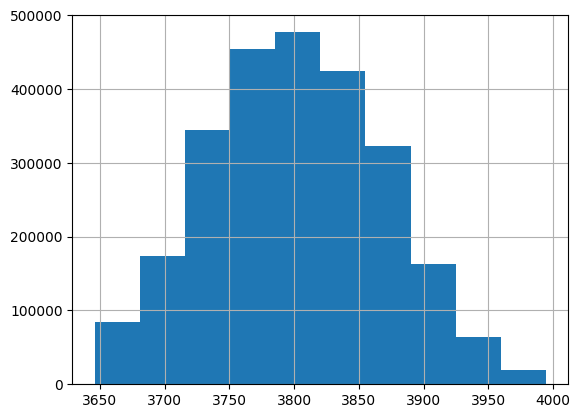

In [25]:
train.problem_rate.hist()

In [26]:
train['log_student_rate'] = train.student_rate.apply(lambda x:log(x))

/tmp/ipykernel_54942/3496608968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_student_rate'] = train.student_rate.apply(lambda x:log(x))


<Axes: >

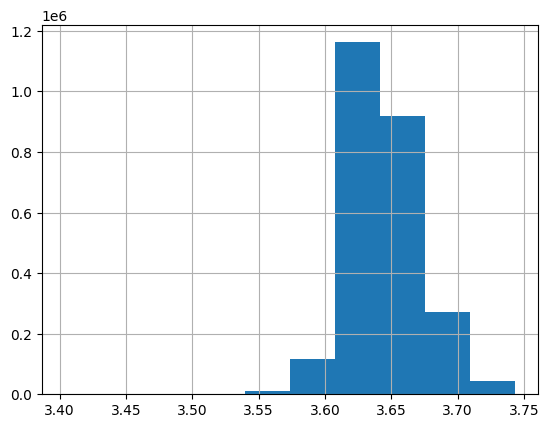

In [27]:
train['log_student_rate'].hist()

In [38]:
def rate(arr):
    # 수능 등급 기준과 동일하게 0.5시그마 기준으로 1~9등급 나눔
    m, std = arr.mean(), arr.std()
    tarr = ((arr - m) / std + 1.75) * 2
    tarr = tarr.astype(int) + 1
    return tarr.apply(lambda x : min(max(x,1), 9))
    

In [39]:
#학생별로 문제를 푼 수가 달라서 학생만 모아둔 df를 따로 관리하여 추가
problem_df['problem_grade'] = rate(problem_df['problem_rate'])
student_df['student_grade'] = rate(student_df['student_rate'])

In [50]:
student_df['student_grade'].value_counts()

student_grade
7    2153
8    1845
6    1189
5     769
4     575
3     365
1     287
2     231
9      28
Name: count, dtype: int64

<Axes: >

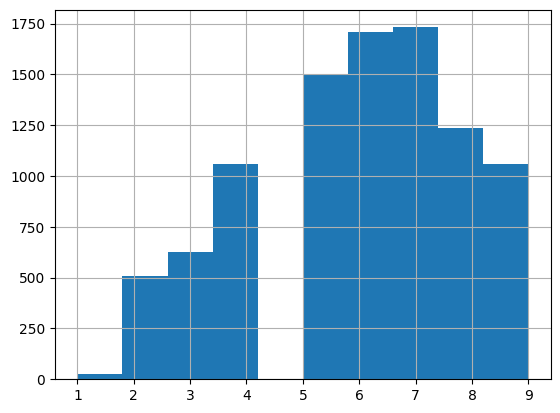

In [41]:
problem_df['problem_grade'].hist()

In [31]:
train = pd.merge(train, problem_df, how='left', on='problem_rate')
train = pd.merge(train, student_df, how='left', on='student_rate')
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,student_rate,problem_rate,log_student_rate,problem_grade,student_grade
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,4393.741434,3737.125432,3.642834,8,4
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,4393.741434,3741.225221,3.642834,8,4
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,4393.741434,3753.388501,3.642834,8,4
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,4393.741434,3740.621231,3.642834,8,4
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,4393.741434,3746.486346,3.642834,8,4
...,...,...,...,...,...,...,...,...,...,...,...
2525951,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,4010.860833,3713.472501,3.603238,9,8
2525952,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,4010.860833,3861.520291,3.603238,5,8
2525953,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,4010.860833,3847.665480,3.603238,5,8
2525954,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,4010.860833,3742.092052,3.603238,8,8


In [32]:
#test에도 같은 칼럼 추가
test['student_rate'] = test.userID.apply(lambda x:student_rate[x])
test['problem_rate'] = test.assessmentItemID.apply(lambda x:problem_rate[x])
test = pd.merge(test, problem_df, how='left', on='problem_rate')
test = pd.merge(test, student_df, how='left', on='student_rate')

/tmp/ipykernel_54942/1396320087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['student_rate'] = test.userID.apply(lambda x:student_rate[x])
/tmp/ipykernel_54942/1396320087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['problem_rate'] = test.assessmentItemID.apply(lambda x:problem_rate[x])


In [ ]:
test

In [ ]:
train.to_csv('./Elo_train.csv',index=False)
test.to_csv('./Elo_test.csv',index=False)